#### Step 1: Loading the Model

In [1]:
from sentence_transformers import SentenceTransformer

C:\Users\khotv\anaconda3\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [2]:
emb_model = SentenceTransformer("BAAI/bge-base-en-v1.5")

#### Step 2: Define Sample Sentences

In [3]:
sentences = [
    "Book a doctor's appointment",
    "Schedule a medical consultation",
    "Set up a visit with the physician",

    "Bake a chocolate cake"
]


#### Step 3: Get Embeddings

In [4]:
embeddings = emb_model.encode(sentences)

In [5]:
embeddings.shape

(4, 768)

In [6]:
embeddings

array([[-4.1632955e-03,  5.1098928e-02,  3.6035806e-02, ...,
        -2.6131144e-02,  1.1284723e-02,  2.4046963e-02],
       [ 2.3674434e-02,  3.2559961e-02, -2.0449083e-02, ...,
         4.9427315e-03,  1.8435083e-02,  2.2205144e-05],
       [ 1.1227425e-02,  3.6741588e-02,  2.3614837e-02, ...,
         6.2287408e-03,  8.8073704e-03,  2.2268210e-02],
       [ 1.5603504e-03,  5.1384717e-02,  3.7857085e-02, ...,
         8.6931624e-03, -5.3099785e-03,  8.0808662e-02]], dtype=float32)

#### Step 4: Measure Similarity

In [7]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(embeddings)

In [8]:
print(similarity_matrix)

[[1.0000001  0.826038   0.80734223 0.42822376]
 [0.826038   1.         0.801526   0.36021453]
 [0.80734223 0.801526   1.0000002  0.39768213]
 [0.42822376 0.36021453 0.39768213 0.9999995 ]]


#### Visualize with PCA

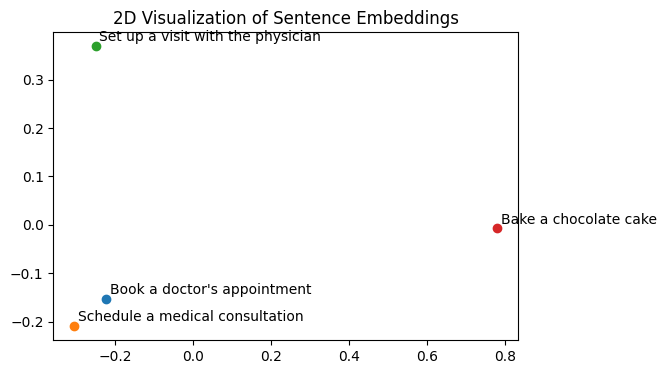

In [9]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(6, 4))
for i, label in enumerate(sentences):
    x, y = reduced_embeddings[i]
    plt.scatter(x, y)
    plt.text(x+0.01, y+0.01, label, fontsize=10)
plt.title("2D Visualization of Sentence Embeddings")
plt.show()

In [21]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer("BAAI/bge-base-en-v1.5")
embeddings = model.encode(sentences, convert_to_tensor=True)

In [19]:
similarity_matrix = util.cos_sim(embeddings, embeddings)
print(similarity_matrix)

tensor([[1.0000, 0.7306, 0.7165, 0.0981],
        [0.7306, 1.0000, 0.7140, 0.0750],
        [0.7165, 0.7140, 1.0000, 0.0277],
        [0.0981, 0.0750, 0.0277, 1.0000]])


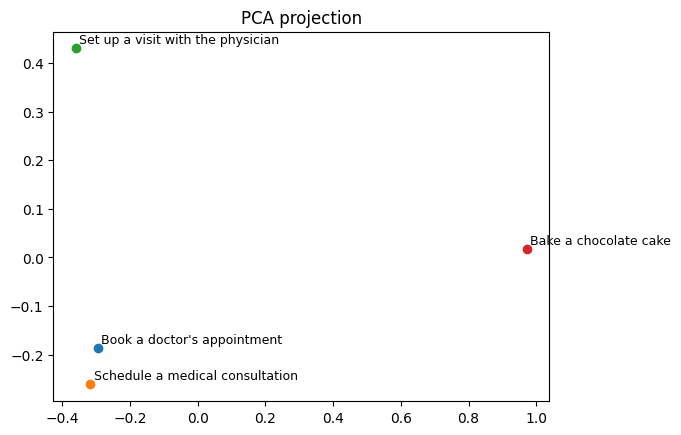

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

for i, label in enumerate(sentences):
    x, y = reduced[i]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, label, fontsize=9)
plt.title("PCA projection")
plt.show()
